# to find the minimum of the maximum. 
As previsouly showned in the results, the maximun travle distance for two set of constraints are Minnesota Vikings': 9968.0 and Miami Dolphins': 10464.0
To try the lowest boundary of 9000 first. 

In [1]:
import gurobipy as gp
from gurobipy import GRB
from gurobipy import *
import pandas as pd
import numpy as np


#list of teams that are included in the analysis
Team_list={
0:"Atlanta Falcons",1:"Carolina Panthers",2:"Chicago Bears",3:"Detroit Lions",
4:"Green Bay Packers",5:"Minnesota Vikings",6:"New Orleans Saints",7:"New York Giants",
8:"Philadelpia Eagles",9:"Tampa Bay Buccaneers",10:"Washington Football Team",11:"Baltimore Ravens",
12:"Buffalo Bills",13:"Cincinnati Bengals",14:"Cleveland Browns",15:"Houston Texans",
16:"Indianapolis Colts",17:"Jacksonville Jaguars",18:"Miami Dolphins",19:"New England Patroits",
20:"New York Jets",21:"Pittsburgh Steelers",22:"Tennessee Titans",23:"Dalls Cowboys"}


W=set(list(range(0,13))) #set of weeks, total of 12 weeks
T=set(list(range(0,24))) #set of teams all, total of 24 teams
#set of conference
D1=set(list(range(0,12)))  #set of AFC teams
D2=set(list(range(12,24))) #set of NFC teams

#read the distance file
E=pd.read_csv("distance.csv",index_col=0)
week = 13

In [2]:
# Create an empty model
m= gp.Model(name="NFL3")
# ADD DECISION VARIABLES HERE
x = m.addVars(T, T, W, vtype = GRB.BINARY, name = "X")
obj = sum(E.iloc[i,j]*x[i,j,k] for i in T for j in T for k in W)*2

# ADD CONSTRAINTS
# add constraints that The season was limited to 12 weeks
m.addConstrs(sum(sum(x[i,j,k]+x[j,i,k] for k in W) for i in T) == 12 for j in T)
# add constraints that Each team would play once per week
m.addConstrs(sum(x[i,j,k]+x[j,i,k] for j in T) == 1 for i in T for k in range(0,8))
m.addConstrs(sum(x[i,j,k]+x[j,i,k] for j in T) == 1 for i in T for k in range(9,13))
# add constraints that All 12 games that a team played would need to be against a different opponent
m.addConstrs(sum(x[i,j,k]+x[j,i,k]for k in W) <= 1 for i in T for j in T)
# add constraints that Each team would play at most six home games (i.e., on their home stadium)
m.addConstrs(sum(sum(x[i,j,k] for k in W) for j in T) <=6 for i in T)
# add constraints to avoid circumstances that i=i
m.addConstrs(x[i,i,k] == 0 for i in T for i in T for k in W)
# add constraints to let binary variables are bound between 0 and 1
m.addConstrs(x[i,j,k] <= 1 for i in T for j in T for k in W)
m.addConstrs(x[i,j,k] >= 0 for i in T for j in T for k in W)

# add gaming pattern constraints for 2a
m.addConstrs(sum(x[i,j,k]+x[i,j,k+1]+x[i,j,k+2] for j in T) <= 2 for i in T for k in range(week-2))
m.addConstrs(sum(x[i,j,k]+x[i,j,k+1]+x[i,j,k+2] for j in T) >= 1 for i in T for k in range(week-2))

# add gaming pattern constraints for there are no games on week9
m.addConstrs(x[i,j,8] == 0 for i in T for j in T)
#3. Eachteam has a maximum distance to travel of 9000
m.addConstrs((sum(x[i,j,k] * E.iloc[i,j] * 2 for k in W for i in T) <= 9000
            for j in T))
#optimize the model
m.setObjective(obj, GRB.MINIMIZE)
m.optimize()

Using license file /Users/zhangmaojn/gurobi.lic
Academic license - for non-commercial use only
Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 24504 rows, 7488 columns and 118558 nonzeros
Model fingerprint: 0x9336402d
Variable types: 0 continuous, 7488 integer (7488 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [7e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 9e+03]
Presolve removed 23484 rows and 864 columns
Presolve time: 0.23s
Presolved: 1020 rows, 6624 columns, 59592 nonzeros
Variable types: 0 continuous, 6624 integer (6624 binary)

Root relaxation: objective 1.659080e+05, 8391 iterations, 1.25 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 165908.000    0  375          - 165908.000      -     -    3s
     0     0 165908.000    0  505          - 165908.000      -  

There is no feasible solution for minimum of 9000. 

In [4]:
# Create an empty model
m= gp.Model(name="NFL3")
# ADD DECISION VARIABLES HERE
x = m.addVars(T, T, W, vtype = GRB.BINARY, name = "X")
obj = sum(E.iloc[i,j]*x[i,j,k] for i in T for j in T for k in W)*2

# ADD CONSTRAINTS
# add constraints that The season was limited to 12 weeks
m.addConstrs(sum(sum(x[i,j,k]+x[j,i,k] for k in W) for i in T) == 12 for j in T)
# add constraints that Each team would play once per week
m.addConstrs(sum(x[i,j,k]+x[j,i,k] for j in T) == 1 for i in T for k in range(0,8))
m.addConstrs(sum(x[i,j,k]+x[j,i,k] for j in T) == 1 for i in T for k in range(9,13))
# add constraints that All 12 games that a team played would need to be against a different opponent
m.addConstrs(sum(x[i,j,k]+x[j,i,k]for k in W) <= 1 for i in T for j in T)
# add constraints that Each team would play at most six home games (i.e., on their home stadium)
m.addConstrs(sum(sum(x[i,j,k] for k in W) for j in T) <=6 for i in T)
# add constraints to avoid circumstances that i=i
m.addConstrs(x[i,i,k] == 0 for i in T for i in T for k in W)
# add constraints to let binary variables are bound between 0 and 1
m.addConstrs(x[i,j,k] <= 1 for i in T for j in T for k in W)
m.addConstrs(x[i,j,k] >= 0 for i in T for j in T for k in W)

# add gaming pattern constraints for 2a
m.addConstrs(sum(x[i,j,k]+x[i,j,k+1]+x[i,j,k+2] for j in T) <= 2 for i in T for k in range(week-2))
m.addConstrs(sum(x[i,j,k]+x[i,j,k+1]+x[i,j,k+2] for j in T) >= 1 for i in T for k in range(week-2))

# add gaming pattern constraints for there are no games on week9
m.addConstrs(x[i,j,8] == 0 for i in T for j in T)
#3. Eachteam has a maximum distance to travel of 9500
m.addConstrs((sum(x[i,j,k] * E.iloc[i,j] * 2 for k in W for i in T) <= 9500
            for j in T))
#optimize the model
m.setObjective(obj, GRB.MINIMIZE)
m.optimize()

Gurobi Optimizer version 9.0.3 build v9.0.3rc0 (mac64)
Optimize a model with 24504 rows, 7488 columns and 118558 nonzeros
Model fingerprint: 0xea771bb7
Variable types: 0 continuous, 7488 integer (7488 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+03]
  Objective range  [7e+01, 4e+03]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 23484 rows and 864 columns
Presolve time: 0.28s
Presolved: 1020 rows, 6624 columns, 59592 nonzeros
Variable types: 0 continuous, 6624 integer (6624 binary)

Root relaxation: objective 1.659080e+05, 9240 iterations, 1.37 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 165908.000    0  331          - 165908.000      -     -    4s
     0     0 165908.000    0  507          - 165908.000      -     -    4s
     0     0 165908.000    0  492          - 165908.000      -     -    5s
     0   

In [5]:
# ADD PRINTING HERE:

# print the total distance travelled by all teams
print('\nValue of objective function: %g' % m.objVal)

# print the optimal schedule for Cleveland Browns
#14:"Cleveland Browns"
rows=[]
for v in m.getVars():
    if v.varName.find("14")!= -1 and v.x==1:
        rows.append([v.varName, v.x])
print('\n Schedule for Cleveland Browns')
df = pd.DataFrame(rows, columns=["v.varName", "v.x"])
print(df)


# Q3: print distance that each team travels
distance_eachteam = {}

for a in Team_list:
    distance_travelled = 0
    for w in range(12):
        for h in range(24):
            distance_travelled += x[h,a,w].x*E.iloc[h,a]*2
        distance_eachteam[Team_list[a]] = distance_travelled

print(distance_eachteam)

keymax = max(distance_eachteam, key=distance_eachteam.get)
keymin = min(distance_eachteam, key=distance_eachteam.get)
print('\nTeam which travels the max distance:' +' '+ keymax)
print('\nTeam which travels the min distance:' +' '+  keymin)

Difference = distance_eachteam[max(distance_eachteam, key=distance_eachteam.get)]-distance_eachteam[min(distance_eachteam, key=distance_eachteam.get)]
print('\nDifference in distance travelled: %g' % Difference)


Value of objective function: 165908

 Schedule for Cleveland Browns
      v.varName  v.x
0     X[2,14,4]  1.0
1     X[4,14,1]  1.0
2    X[5,14,10]  1.0
3    X[11,14,0]  1.0
4    X[12,14,3]  1.0
5    X[13,14,7]  1.0
6     X[14,3,5]  1.0
7    X[14,7,11]  1.0
8    X[14,16,9]  1.0
9    X[14,19,6]  1.0
10  X[14,20,12]  1.0
11   X[14,21,2]  1.0
{'Atlanta Falcons': 6270.0, 'Carolina Panthers': 6934.0, 'Chicago Bears': 4436.0, 'Detroit Lions': 5122.0, 'Green Bay Packers': 8956.0, 'Minnesota Vikings': 7336.0, 'New Orleans Saints': 7754.0, 'New York Giants': 6022.0, 'Philadelpia Eagles': 6112.0, 'Tampa Bay Buccaneers': 7150.0, 'Washington Football Team': 5034.0, 'Baltimore Ravens': 7590.0, 'Buffalo Bills': 4246.0, 'Cincinnati Bengals': 5910.0, 'Cleveland Browns': 4910.0, 'Houston Texans': 7376.0, 'Indianapolis Colts': 6420.0, 'Jacksonville Jaguars': 8852.0, 'Miami Dolphins': 7846.0, 'New England Patroits': 4688.0, 'New York Jets': 1764.0, 'Pittsburgh Steelers': 4122.0, 'Tennessee Titans': 5922.

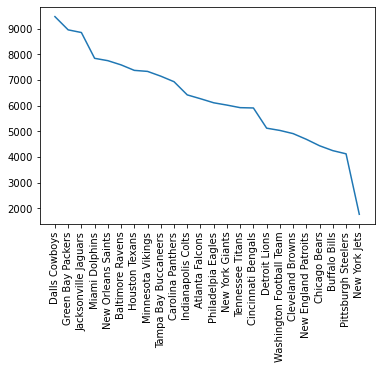

In [9]:
import matplotlib.pylab as plt

lists = sorted(distance_eachteam.items(), key=lambda x: x[1], reverse = True) 

x, y = zip(*lists)
plt.xticks(rotation=90) 

plt.plot(x, y)
plt.show()